In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.optimize import curve_fit
from lab_lib import *


In [18]:
def make_plot_with_2mnk(file, title, xlabel, ylabel, x, y, dx, dy, k_b1, k_b2):

    mpl.rcParams['font.size'] = 16                   # Управление стилем, в данном случаем - размером шрифта
    plt.figure(figsize = (10,8), facecolor = "white") # Создаем фигуру

    # Подписываем оси и график
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    #plt.errorbar(x, y, "or", markersize = 9, label = 'Экспериментальные значения')
    plt.errorbar(x, y, xerr = dx, yerr = dy, fmt='.r', label = 'Экспериментальные значения')
    #plt.plot(x, y, "+b", label = "Экспериментальные данные", linewidth = 1)

    line1_x, line1_y = mnk_line_get_points(x, y, dx, dy, k_b1)
    line2_x, line2_y = mnk_line_get_points(x, y, dx, dy, k_b2)

    plt.plot(line1_x, line1_y, "b", label = r"Касательная на линейном участке")
    plt.plot(line2_x, line2_y, "g--", label = r"Касательная на отклоняющемся участке", )

    plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)   # Активируем сетку
    plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

    plt.minorticks_on()
    plt.tight_layout()
    plt.legend(loc = "best", fontsize = 12) # Активируем легенду графика

    plt.savefig("{}".format(file))
    plt.show()

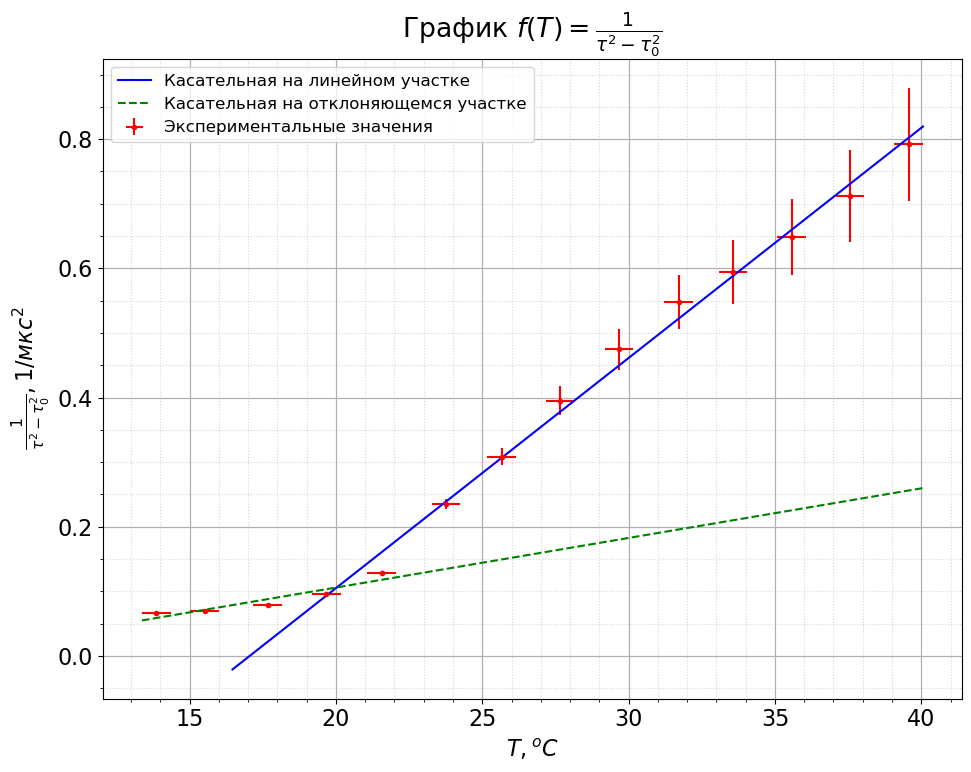

$17.2 \pm 0.5$
$8 \pm 2$


In [19]:
k_T_mV = 24
tau_0 = 6.9092

T_tau = [[[i[0] - i[1]*k_T_mV, np.sqrt(0.1**2 + (0.02*k_T_mV)**2)], [i[2], 0.01]] for i in pd.read_csv("data/data.csv").to_numpy()]

f_T = [[i[0], [1 / (i[1][0]**2 - tau_0**2), 2*i[1][0]/(i[1][0]**2 - tau_0**2)**2 * i[1][1]]] for i in T_tau]

Tetha_p_k = mnk([i[0][0] for i in f_T[4:]], [i[1][0] for i in f_T[4:]])
Tetha_k_k = mnk([i[0][0] for i in f_T[:5]], [i[1][0] for i in f_T[:5]])

make_plot_with_2mnk("img/plot.png", r"График $f(T) = \frac{1}{\tau^2 - \tau_0^2}$", r"$T, {}^oC$", r"$\frac{1}{\tau^2 - \tau_0^2}, 1/мкс^2$",
                            [i[0][0] for i in f_T], [i[1][0] for i in f_T], [i[0][1] for i in f_T], [i[1][1] for i in f_T], Tetha_p_k, Tetha_k_k)

Tetha_p = mnk([i[1][0] for i in f_T[4:]], [i[0][0] for i in f_T[4:]])[1]
Tetha_k = mnk([i[1][0] for i in f_T[:5]], [i[0][0] for i in f_T[:5]])[1]

print(texAns(Tetha_p))
print(texAns(Tetha_k))